# Unit 5 - Financial Planning


In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as alpaca
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_assets = {
    "crypto_shares": [1.2, 5.3]
}

tickers = ["BTC", "ETH"]

df_crypto = pd.DataFrame(crypto_assets, index=tickers)

df_crypto

,crypto_shares
BTC,1.2
ETH,5.3


In [7]:
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"+"?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"+"?format=json"

In [9]:
# Fetch current BTC price
# YOUR CODE HERE!

btc_response = requests.get(btc_url)

# Fetch current ETH price
# YOUR CODE HERE!]

eth_response = requests.get(eth_url)

btc_response_content = btc_response.content
eth_response_content = eth_response.content

btc_data = btc_response.json()
eth_data = eth_response.json()


# Compute current value of my crpto
# YOUR CODE HERE!
btc_current_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_current_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print current crypto wallet balance
print(f"The current value of your {btc_current_value} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {eth_current_value} ETH is ${eth_current_value:0.2f}")

The current value of your 11373.86 BTC is $11373.86
The current value of your 368.99 ETH is $368.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
# YOUR CODE HERE!
balance_assets = {
    "balance_shares": [200, 50]
}

tickers = ["AGG", "SPY"]

df_balance = pd.DataFrame(balance_assets, index=tickers)

df_balance

,balance_shares
AGG,200
SPY,50


In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

api = alpaca.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
# Create the Alpaca API object
# YOUR CODE HERE!

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_port = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
# YOUR CODE HERE!
df_port

AGG                                      SPY  \
                             open    high     low    close   volume   open   
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_port["AGG"]["close"])
spy_close_price = float(df_port["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * df_balance.loc["AGG"]["balance_shares"]
my_spy_value = spy_close_price * df_balance.loc["SPY"]["balance_shares"]

# Print current value of share
print(f"The current value of your {my_spy_value} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg_value} AGG shares is ${my_agg_value:0.2f}")

The current value of your 15944.5 SPY shares is $15944.50
The current value of your 23731.0 AGG shares is $23731.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = {'amount': ['11700.58','39675.5']
              
    
}
# Display savings DataFrame
display(df_savings)

{'amount': ['11700.58', '39675.5']}

In [16]:
# Plot savings pie chart
# YOUR CODE HERE!

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
x = 
# Validate saving health
# YOUR CODE HERE!

SyntaxError: invalid syntax (<ipython-input-17-049c073ea190>, line 6)

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = "1D"
tickers = ["SPY", "AGG"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [ ]:
#I only ran 100 simultaions because my computer kept crashing

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 100,
    num_trading_days = 252*30
)


In [22]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005024,1.003996,0.992471,0.995777,1.000537,0.998916,1.003034,0.992035,0.992269,1.007006,...,0.992038,1.007332,0.992523,0.999364,1.002759,1.003010,1.002392,0.996642,1.006498,0.999703
2,1.005809,0.999847,0.994218,0.995520,1.010131,0.998299,1.003945,0.993354,0.990547,1.002535,...,0.991347,1.010589,0.992909,0.994610,1.007362,0.998669,0.997938,0.995496,1.003735,1.000204
3,1.001275,0.997612,0.996484,0.996030,1.009200,1.003042,1.000413,0.985785,0.990570,0.995852,...,0.992503,1.009016,0.998085,0.989826,1.017288,1.007678,0.996604,0.998362,1.002584,0.987519
4,1.002992,1.000958,0.992810,0.998185,1.016699,1.007707,1.009462,0.984886,0.994281,0.995814,...,0.988444,1.006129,0.992028,0.982640,1.009208,1.003196,0.999463,0.989925,1.000899,0.984578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.992148,4.497514,6.970422,2.153253,5.117516,3.092685,4.295662,4.041559,4.525696,7.130094,...,4.388172,9.023209,6.064675,4.511404,13.752537,4.157092,4.504330,4.409257,6.820158,3.676960
7557,2.972527,4.506530,6.967293,2.139021,5.120304,3.108068,4.281891,4.030654,4.529153,7.099482,...,4.374447,9.119109,6.115294,4.525042,13.773232,4.151034,4.500361,4.420393,6.809299,3.671875
7558,2.970884,4.477886,6.982959,2.154023,5.158919,3.104418,4.293164,4.035716,4.576105,7.137749,...,4.399557,9.075002,6.078648,4.512190,13.908766,4.155620,4.512931,4.416036,6.758035,3.652725
7559,3.007725,4.481965,7.005979,2.163726,5.161078,3.100455,4.281893,4.038014,4.557944,7.159713,...,4.396002,8.998894,6.082339,4.483919,13.968344,4.163149,4.526459,4.440041,6.744600,3.628649


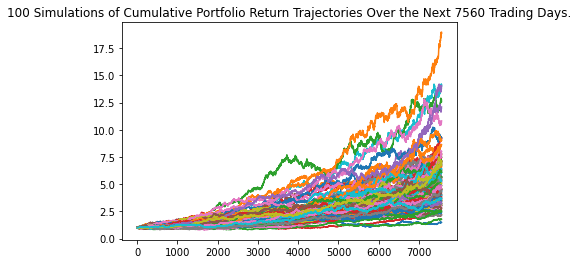

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

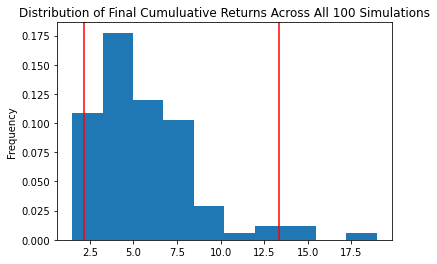

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
results_tbl = MC_even_dist.summarize_cumulative_return()

even_ci_lower = round(results_tbl[8]*12000,2)
even_ci_upper = round(results_tbl[9]*12000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print(results_tbl)

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $25888.45 and $160124.67.
count           100.000000
mean              5.562708
std               2.834507
min               1.480072
25%               3.508084
50%               4.965904
75%               6.857960
max              18.953962
95% CI Lower      2.157371
95% CI Upper     13.343722
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000


# Print summary statistics
# YOUR CODE HERE!
more_ci_lower = round(results_tbl[8]*20000,2)
more_ci_upper = round(results_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${more_ci_lower} and ${more_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43147.41 and $266874.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [47]:
# Set initial investment
onetimes_investment = 18000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
onetimes_ci_lower = round(results_tbl[8]*'onetimes_investment',2)
onetimes_ci_upper = round(results_tbl[9]*'onetimes_investment',2)

# Print results
print(f"There is a 95% chance that an initial investment of ${onetimes_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${onetimes_ci_lower} and ${onetimes_ci_upper}")

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")